# IRIS-Flower-classification

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit. 
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя. 

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

В качестве задания вам предлагается повторить данные действия по классификации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [1]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns 
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#метрики
from sklearn import metrics
#Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/omo/main/data/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

In [4]:
# Выделим признаки и результат
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

fn = ['sepal_length','sepal_width','petal_length','petal_width']
cn = data['species'].unique()

# К ближайших соседей

Пусть дана обучающая выборка $X = \{ (x_i, y_i)\}_{i = 1}^{\ell}$
и функция расстояния $\rho: X \times X \to [0, \infty)$,
и требуется классифицировать новый объект $u \in X$.
Расположим объекты обучающей выборки $X$ в порядке возрастания
расстояний до $u$:
$$
    \rho(u, x_u^{(1)})
    \leq
    \rho(u, x_u^{(2)})
    \leq
    \dots
    \leq
    \rho(u, x_u^{(\ell)}),
$$
где через $x_u^{(i)}$ обозначается $i$-й сосед объекта $u$.
Алгоритм __k ближайших соседей__ относит объект $u$ к тому классу,
представителей которого окажется больше всего среди $k$ его ближайших соседей:
$$
    a(u; X, k) = argmax_{y \in Y} \sum_{i = 1}^{k} w_i [y_u^{(i)} = y].
$$

Параметр $k$ обычно настраивается с помощью кросс-валидации.

В классическом методе $k$ ближайших соседей все объекты имеют единичные веса: $w_i = 1$.
Такой подход, однако, не является самым разумным.
Допустим, что $k = 3$, $\rho(u, x_u^{(1)}) = 1$, $\rho(u, x_u^{(2)}) = 1.5$,
$\rho(u, x_u^{(3)}) = 100$.
Ясно, что третий сосед находится слишком далеко и не должен оказывать сильное влияние на ответ.
Эта идея реализуется с помощью весов, обратно пропорциональных расстоянию:
$$
    w_i
    =
    K \left(
        \rho(u, x_u^{(i)})
    \right),
$$
где $K(x)$ --- любая монотонно убывающая функция.

С помощью метода $k$ ближайших соседей можно решать и задачи регрессии.
Для этого нужно усреднить значения целевой функции на соседях с весами:
$$
    a(u; X, k)
    =
    \frac{
        \sum_{i = 1}^{k}
            w_i y_u^{(i)}
    }{
        \sum_{i = 1}^{k}
            w_i
    },
$$

где $y_u^{(i)}$ "--- значение целевой переменной на объекте $x_u^{(i)}.$


In [5]:
# Метод ближайших соседей, k=5
mod_knn=KNeighborsClassifier(n_neighbors=5) 
mod_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [6]:
#Выполняем предсказание
y_pred=mod_knn.predict(X_test)

print('accuracy (точность) классификатора',metrics.accuracy_score(y_pred,y_test))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора 0.9333333333333333
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]


In [7]:
# Использование построенной модели для предсказания класса
new_iris=[1.3, 2.4, 5.6, 3.5]
y_new_iris=mod_knn.predict([new_iris])

print(y_new_iris)

['Iris-virginica']


# Повторяем действия для Somerville Happiness Survey Data Set

1. D = decision attribute (D) with values 0 (unhappy) and 1 (happy)
2. X1 = the availability of information about the city services
3. X2 = the cost of housing
4. X3 = the overall quality of public schools
5. X4 = your trust in the local police
5. X5 = the maintenance of streets and sidewalks
6. X6 = the availability of social community eventsevents

Attributes X1 to X6 have values 1 to 5.

In [8]:
data = pd.read_excel('data/SomervilleHappinessSurvey2015.xlsx', header=[1])
data.head(5)

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


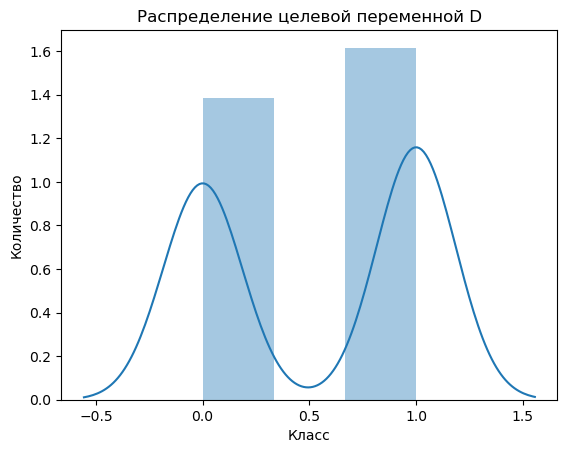

In [9]:
sns.distplot(data['D'])
plt.title('Распределение целевой переменной D')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

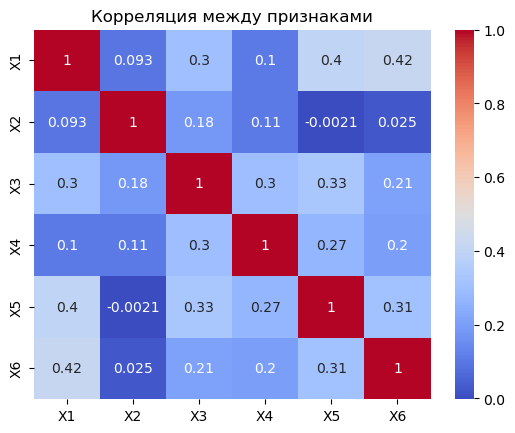

In [10]:
corr = data[['X1','X2','X3','X4','X5','X6']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

In [11]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['D'], random_state = 42)

In [12]:
X_train = train[['X1','X2','X3','X4','X5','X6']]
y_train = train.D
X_test = test[['X1','X2','X3','X4','X5','X6']]
y_test = test.D

fn = ['X1','X2','X3','X4','X5','X6']
cn = data['D'].unique()

In [13]:
# Метод ближайших соседей, k=4
mod_knn = KNeighborsClassifier(n_neighbors=4) 
mod_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

accuracy (точность) классификатора 0.5172413793103449


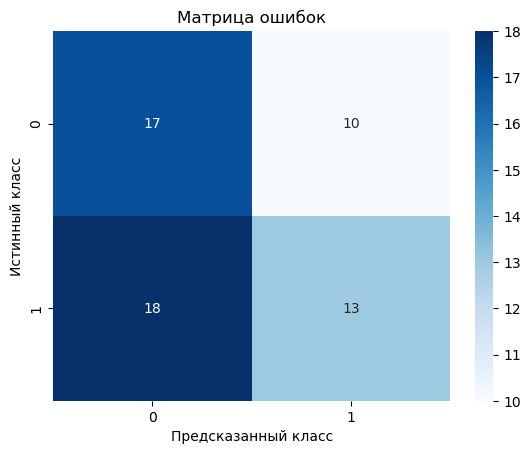

In [14]:
#Выполняем предсказание
y_pred=mod_knn.predict(X_test)

print('accuracy (точность) классификатора', metrics.accuracy_score(y_pred, y_test))

# матрица ошибок
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

In [20]:
# Использование построенной модели для предсказания класса
x_pred = [5, 4, 5, 5, 4, 4]
y_pred = mod_knn.predict([x_pred])

print(y_pred)

[1]
